# Apply PCA

This notebook exploits scikit learning tools.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib notebook

Load embeddings data. Although the file extension is JSON the format is actually not. Neither numpy nor pandas manage to load the data, hence we simply read the text file and convert to numpy array its values.

In [46]:
filename = '../data/latent_space/ConvolutionalAutoEncoderSmall/embeddings.json'
with open(filename, 'r') as f:
    text = f.read()

embeddings = np.array(eval(text))
embeddings

array([[ 48.30832291, -19.85861588, -28.26527596, ..., -18.07101631,
         14.18932247, -29.45004082],
       [ 39.20355225, -13.51097679, -20.09092522, ...,  16.07262039,
        -14.00217438, -29.61383438],
       [ 47.82370377,  13.43779087, -11.23088551, ...,  -3.88076925,
         -8.63995647,   4.99714375],
       ...,
       [-25.35993958,  18.60124016,  26.11034584, ...,  15.08125782,
          1.95035863,   0.21202324],
       [-16.91211128,  22.32260895,  -6.63937998, ...,  36.84122467,
         -2.2042973 ,  29.02080154],
       [ 47.51185226,  -1.68732834, -22.12441254, ...,   2.12168813,
          5.08312225, -15.3295784 ]])

Check data shape.

In [47]:
np.shape(embeddings)

(17, 64)

Instantiate PCA. 

If <code>n_components</code> parameter is not set then it will keep all of them by default. If <code>n_components == 'mle'</code> and <code>svd_solver == 'full'</code>, Minka’s MLE is used to guess the dimension. Use of <code>n_components == 'mle'</code> will interpret <code>svd_solver == 'auto'</code> as <code>svd_solver == 'full'</code>. Requires <code>n_samples >= n_features</code>. 

We want 3D reduction hence we use <code>n_components=3</code>.

In [48]:
n_components = 3
pca = PCA(n_components=n_components)

Fit the model with data.

In [49]:
pca.fit(embeddings)

PCA(n_components=3)

### Explore the PCA results

Check the amount of variance explained by each of the selected components. The variance estimation uses <code>n_samples - 1</code> degrees of freedom. It is equal to <code>n_components</code> largest eigenvalues of the covariance matrix.

In [50]:
pca.explained_variance_

array([7841.66800676, 3428.55001383, 2549.68212292])

Check principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by <code>explained_variance_</code>.

In [51]:
pca.components_

array([[ 2.63343601e-01, -5.71292057e-02, -1.73021236e-01,
         1.41645873e-02,  6.39701574e-02, -3.89207797e-03,
         9.89452347e-02, -6.69517473e-02,  2.69475983e-03,
         3.32453037e-02,  4.45865307e-04,  9.37961020e-02,
        -4.30217351e-03,  6.92767016e-02, -1.22661212e-02,
         6.32885879e-03, -2.93603937e-02, -4.90423786e-02,
        -8.32402845e-02, -9.43300506e-02, -3.58149715e-02,
        -8.98123699e-02, -7.80751640e-03,  1.38503617e-01,
         1.31475449e-01,  1.53895462e-01,  8.02407174e-02,
        -6.06050576e-02, -1.24538984e-01,  3.83195957e-02,
         1.36848184e-01, -4.38869879e-03, -7.88480764e-02,
        -3.56094631e-01, -8.39585186e-02,  5.21071529e-01,
         9.21168001e-02,  4.22727230e-01, -2.61445942e-04,
         9.31568233e-02, -7.08255322e-02, -2.10672272e-03,
         1.21400342e-01,  1.30861747e-01, -1.94797540e-02,
        -1.35493349e-01, -9.54067946e-03,  6.81133351e-02,
        -1.36306463e-02, -6.66565917e-02,  7.42690394e-0

Check number of samples and features.

In [52]:
pca.n_samples_, pca.n_features_

(17, 64)

Check singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the <code>n_components</code> variables in the lower-dimensional space.

In [53]:
pca.singular_values_

array([354.21277237, 234.21528605, 201.97750857])

Check percentage of variance explained by each of the selected components.

In [54]:
pca.explained_variance_ratio_

array([0.28667839, 0.12534211, 0.09321216])

Print labels.

In [56]:
labels = pca.get_feature_names_out(input_features=None)
labels

array(['pca0', 'pca1', 'pca2'], dtype=object)

Fit the model with data and apply the dimensionality reduction.

In [57]:
reduced = pca.fit_transform(embeddings)
np.shape(reduced)

(17, 3)

<IPython.core.display.Javascript object>


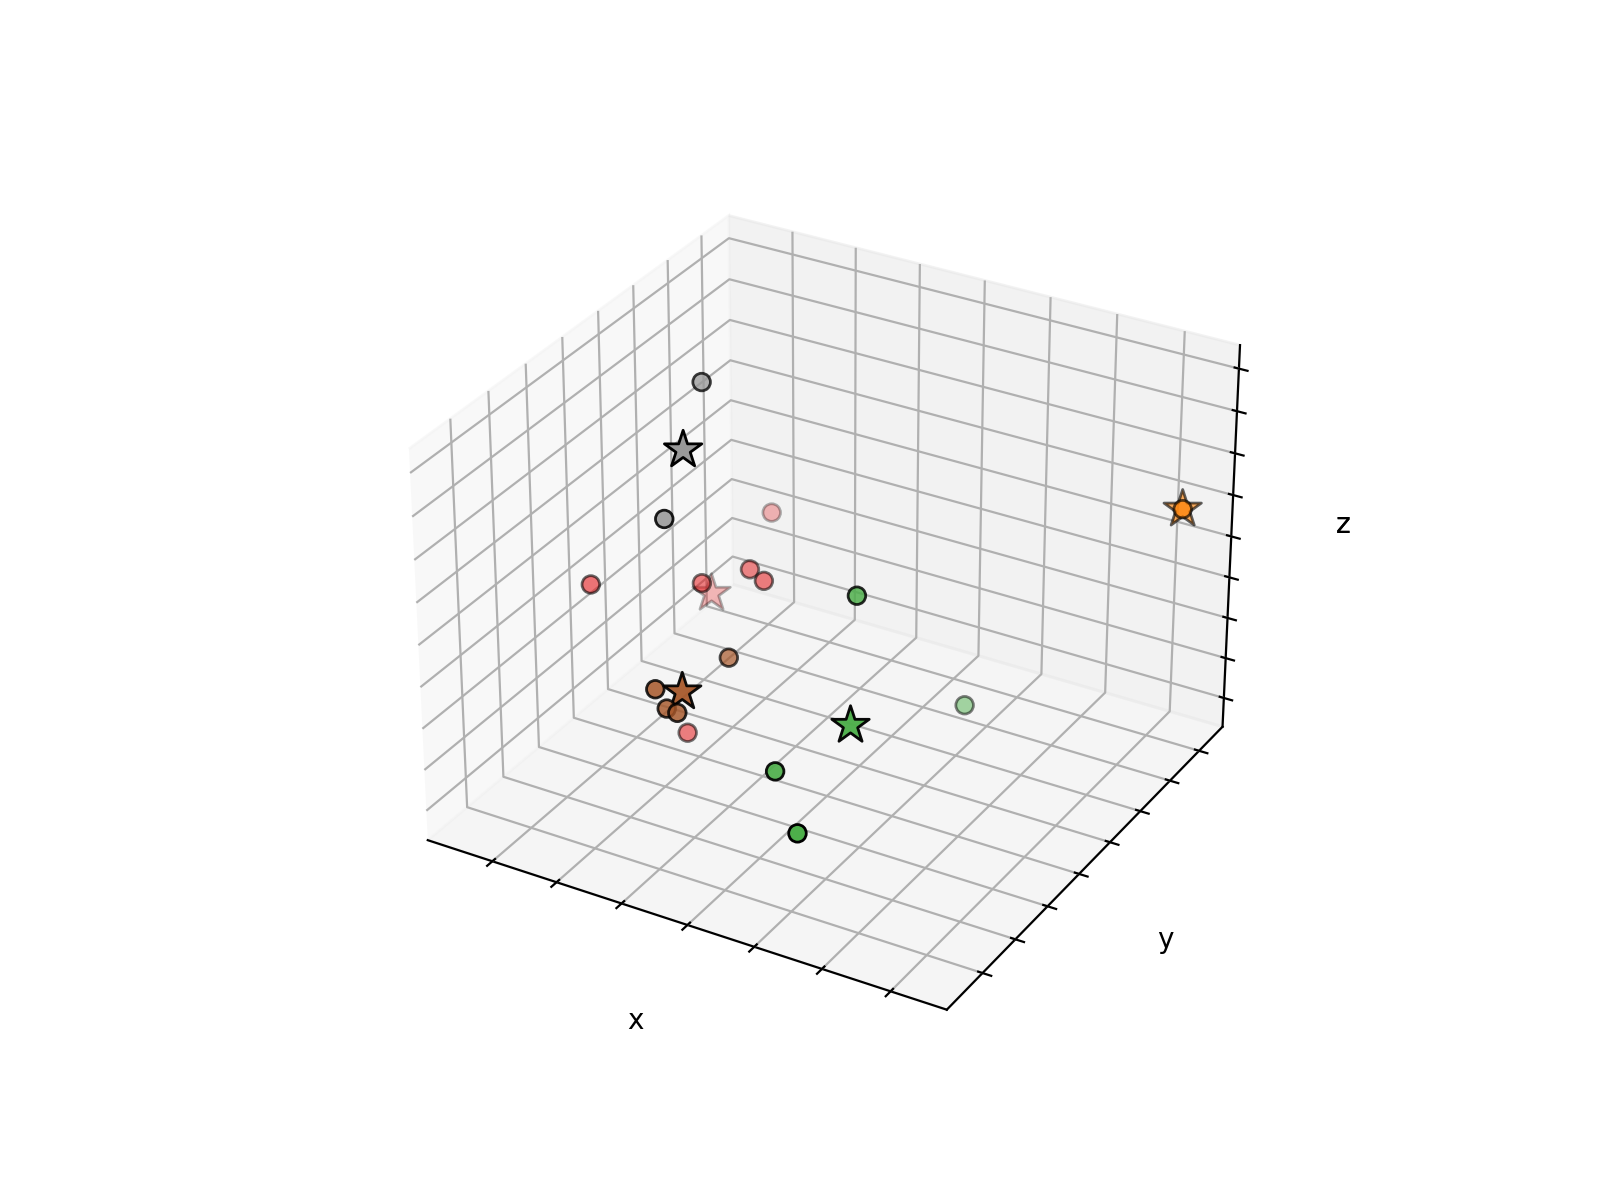

In [58]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    reduced[:, 0],
    reduced[:, 1],
    reduced[:, 2],
    c='b',
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Apply k-means

Apply k-means clustering algorithm on PCA reduced data.

In [59]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(reduced)

Extract labels.

In [60]:
labels = kmeans.labels_

Predict cluster association.

In [61]:
predicted = kmeans.predict(reduced)
predicted

array([2, 1, 1, 3, 3, 3, 0, 0, 4, 1, 0, 0, 3, 4, 0, 0, 1], dtype=int32)

Compute cluster centers.

In [62]:
centers = kmeans.cluster_centers_
centers

array([[-75.115476  ,  33.77448178, -21.37902598],
       [ 91.97773743, -23.66938441, -21.71905191],
       [215.52489339, 106.37751885,  45.49973317],
       [-11.30796205, -46.72023779,  -9.48191522],
       [-43.75556947, -13.73296038, 103.78914563]])

Create associated color array.

In [63]:
colors = np.arange(0, n_clusters, 1)
colors

array([0, 1, 2, 3, 4])

Plot PCA reduced data and cluster centers, using cluster association color-coding.

<IPython.core.display.Javascript object>


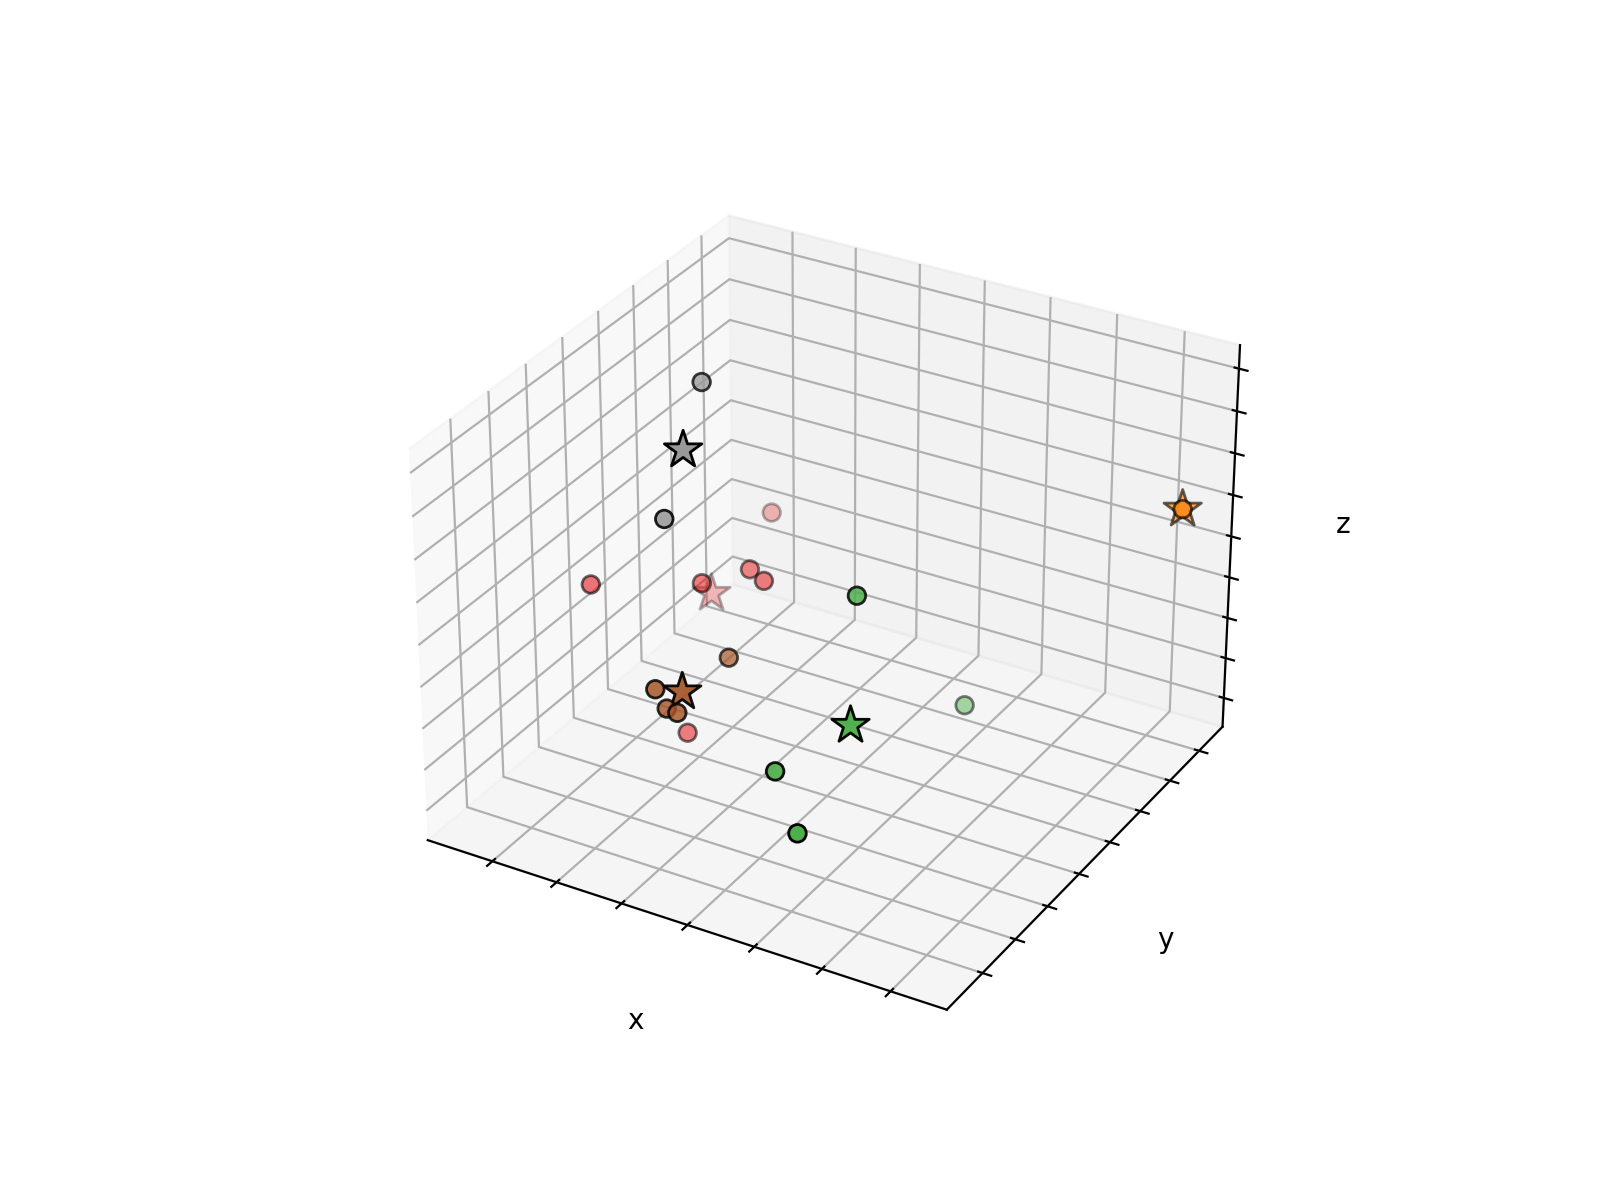

In [65]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    reduced[:, 0],
    reduced[:, 1],
    reduced[:, 2],
    c=predicted.astype(float),
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.scatter(
    centers[:, 0],
    centers[:, 1],
    centers[:, 2],
    marker='*',
    c=colors,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=200,
)

ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()